<a href="https://colab.research.google.com/github/Vickyhackgit/Portfolio/blob/main/Crop%20Residue-to-Industry%20Recommendation%20Model_IIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crop Residue-to-Industry Recommendation Model
"Project Report
Submitted by:
 Vicky Kumar
 BS‑MS Student
 Indian Institute of Science Education and Research
(IISER) Kolkata
"

data upload. read , & validate


In [ ]:
# all libraries: ----
import pandas as pd

#line starts a function called validate_dataset.

def validate_dataset(filepath):  # line path to the file we want to check.
    df = pd.read_csv(filepath)
# dictionary of all the columns that the dataset is expected to be present
    required_columns = {
        'Farm_ID': 'numeric/string',
        'Crop_Type': 'categorical',
        'Residue_Type': 'categorical',
        'Moisture_pct': 'numeric (0-100)',
        'Cellulose_pct': 'numeric (0-100)',
        'CN_Ratio': 'numeric',
        'Calorific_MJ_kg': 'numeric',
        'Lignin_pct': 'numeric (0-100)',
        'Nitrogen_pct': 'numeric (0-100)',
        'Silica_pct': 'numeric (0-100)',
        'Ash_pct': 'numeric (0-100)',
        'Bulk_Density': 'numeric',
        'Harvest_Season': 'categorical',
        'Storage_Condition': 'categorical',
        'Transportation_Distance_km': 'numeric',
        'Local_Market_Price': 'numeric',
        'Residue_Age_days': 'numeric',
        'Best_Industry': 'categorical (target)'
    }
# Print dataset info:
    print("=== Dataset Validation Report ===")
    print(f"Total samples: {len(df)}")
    print(f"Columns found: {len(df.columns)}")
#Check for missing columns


    missing_cols = set(required_columns.keys()) - set(df.columns)
    if missing_cols:
        print(f"\nMissing required columns: {missing_cols}")
    else:
        print("\nAll required columns present")

    print("\n=== Data Quality Checks ===")
    for col, col_type in required_columns.items():
        null_count = df[col].isnull().sum()
        if null_count > 0:
            print(f" {col} has {null_count} missing values")
#Check each column ;

        if 'numeric' in col_type:
            if df[col].dtype not in ['int64', 'float64']:
                print(f" {col} should be numeric but is {df[col].dtype}")

    print("\n=== Target Class Distribution ===")
    print(df['Best_Industry'].value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))

    return df

if __name__ == "__main__":
    df = validate_dataset("/content/train updata.csv")
    print("\nData validation completed. Check output above for any issues.")

# for read & show 1st row dataset---
#df = pd.read_csv('/content/train 100data.csv')
#print(df.head())



=== Dataset Validation Report ===
Total samples: 130
Columns found: 18

All required columns present

=== Data Quality Checks ===
 Farm_ID should be numeric but is object

=== Target Class Distribution ===
Best_Industry
Packaging Unit      23.8%
Biofuel Plant       22.3%
Compost Industry    20.0%
Paper Industry      19.2%
Thermal Plant       14.6%
Name: proportion, dtype: object

Data validation completed. Check output above for any issues.


TRAIN MODEL, using classifier

=== Crop Residue Classification Model Training ===
Data loaded successfully (130 samples)
 Training model with GridSearchCV...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
 Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Test Accuracy: 19.23%

 Classification Report:
                  precision    recall  f1-score   support

   Biofuel Plant       0.25      0.14      0.18         7
Compost Industry       0.11      0.25      0.15         4
  Packaging Unit       0.09      0.17      0.12         6
  Paper Industry       1.00      0.29      0.44         7
   Thermal Plant       0.00      0.00      0.00         2

        accuracy                           0.19        26
       macro avg       0.29      0.17      0.18        26
    weighted avg       0.37      0.19      0.22        26



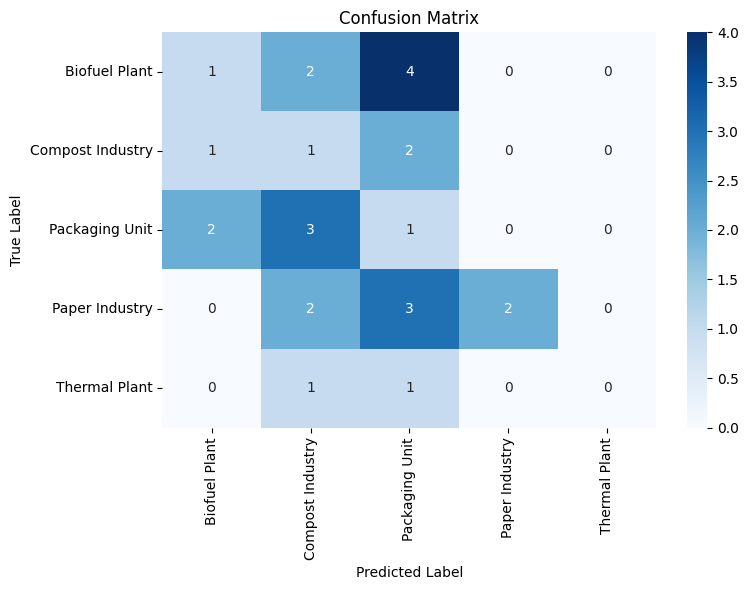

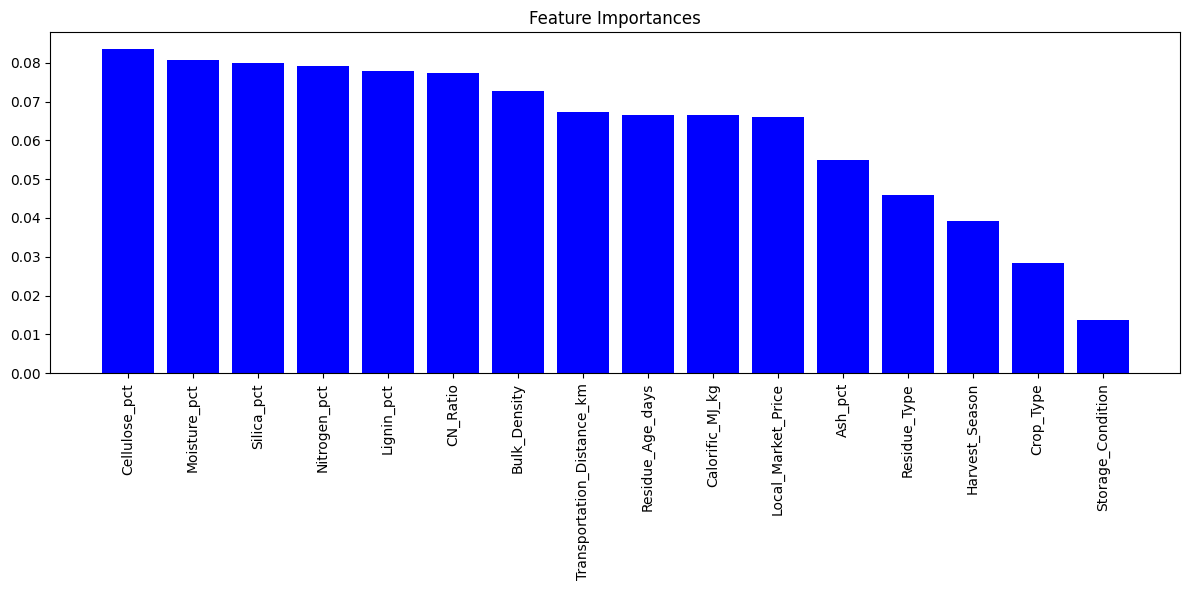

 Model saved to crop_residue_model.joblib

 Training completed! Model saved.


In [ ]:

#Tools we need libraries:


import pandas as pd  ## To handle data (like Excel)
import numpy as np       # For math and arrays
## For machine learning
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                             accuracy_score)
 # For drawing graphs
import matplotlib.pyplot as plt
import seaborn as sns   ## For prettier graphs
import joblib               # To save the model
import warnings         ## To hide warnings
warnings.filterwarnings('ignore')

class CropResidueModel:
    def __init__(self):
        self.model = None
        self.encoders = {
            'Crop_Type': LabelEncoder(),
            'Residue_Type': LabelEncoder(),
            'Harvest_Season': LabelEncoder(),
            'Storage_Condition': LabelEncoder(),
            'Industry': LabelEncoder()
        }
        self.feature_names = [
            'Crop_Type', 'Residue_Type', 'Moisture_pct',
            'Cellulose_pct', 'CN_Ratio', 'Calorific_MJ_kg',
            'Lignin_pct', 'Nitrogen_pct', 'Silica_pct',
            'Ash_pct', 'Bulk_Density', 'Harvest_Season',
            'Storage_Condition', 'Transportation_Distance_km',
            'Local_Market_Price', 'Residue_Age_days'
        ]
#how to prepare data,

#how to train a model,

#how to evaluate it,
#how to save the trained model.

    def preprocess_data(self, df):
        # Encode categorical features,      #This converts words into numbers (like "Wheat" → 0, "Rice" → 1).
        df_encoded = df.copy()
        for col in ['Crop_Type', 'Residue_Type', 'Harvest_Season', 'Storage_Condition']:
            df_encoded[col] = self.encoders[col].fit_transform(df[col])

        # Encode target
        y = self.encoders['Industry'].fit_transform(df['Best_Industry'])

        # Select features
        X = df_encoded[self.feature_names]

        # Handle missing values
        X.fillna(X.median(), inplace=True)

        return X, y

    def train(self, X, y, test_size=0.2, random_state=42):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', RandomForestClassifier(random_state=random_state))
        ])

        param_grid = {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 5]
        }

        print(" Training model with GridSearchCV...")
        grid_search = GridSearchCV(
            pipeline,
            param_grid,
            cv=5,
            n_jobs=-1,
            verbose=1
        )
        grid_search.fit(X_train, y_train)

        self.model = grid_search.best_estimator_
        print(f" Best parameters: {grid_search.best_params_}")

        # Evaluate
        y_pred = self.model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nTest Accuracy: {accuracy:.2%}")

        print("\n Classification Report:")
        print(classification_report(
            y_test,
            y_pred,
            target_names=self.encoders['Industry'].classes_
        ))

        self.plot_confusion_matrix(y_test, y_pred)
        self.plot_feature_importance(X.columns)

        return grid_search.best_score_

    def plot_confusion_matrix(self, y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.encoders['Industry'].classes_,
                    yticklabels=self.encoders['Industry'].classes_)
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.savefig('confusion_matrix.png')
        plt.show()

#Shows where the model got confused (true vs predicted)

    def plot_feature_importance(self, feature_names):
        importances = self.model.named_steps['classifier'].feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(12, 6))
        plt.title("Feature Importances")
        plt.bar(range(len(indices)), importances[indices], color='b', align='center')
        plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.savefig('feature_importance.png')
        plt.show()

    def save_model(self, path='crop_residue_model.joblib'):
        joblib.dump({
            'model': self.model,
            'encoders': self.encoders,
            'feature_names': self.feature_names
        }, path)
        print(f" Model saved to {path}")

if __name__ == "__main__":
    print("=== Crop Residue Classification Model Training ===")

    # Load data
    try:
        df = pd.read_csv("/content/train updata.csv")
        print("Data loaded successfully ({} samples)".format(len(df)))
    except Exception as e:
        print(f"Error loading data: {e}")
        exit()

    # Initialize and train model
    model = CropResidueModel()
    X, y = model.preprocess_data(df)
    model.train(X, y)
    model.save_model()

    print("\n Training completed! Model saved.")

#train_test_split – Randomly splits your data to test how good the model is.
#Pipeline – Combines steps (scaling + model) into one clean process.
#GridSearchCV – Tries different settings (like tree depth) to find the best model.
#classification_report –tell about prediction model





predicting model:---


In [ ]:
import joblib
import pandas as pd
import numpy as np

class ResiduePredictor:
    def __init__(self, model_path='crop_residue_model.joblib'):
        try:
            model_data = joblib.load(model_path)
            self.model = model_data['model']
            self.encoders = model_data['encoders']
            self.feature_names = model_data['feature_names']
            print(" Model loaded successfully")
        except Exception as e:
            print(f" Error loading model: {e}")
            raise

    def prepare_input(self, input_data):
        """Convert raw input to properly encoded features"""
        input_df = pd.DataFrame([input_data])

        # Encode categorical features
        for col in ['Crop_Type', 'Residue_Type', 'Harvest_Season', 'Storage_Condition']:
            input_df[col] = self.encoders[col].transform(input_df[col])

        # Ensure all features are present
        missing_features = set(self.feature_names) - set(input_df.columns)
        if missing_features:
            for f in missing_features:
                input_df[f] = 0  # Default value for missing features

        return input_df[self.feature_names]

    def predict(self, input_data):
        """Make prediction on new sample"""
        try:
            # Prepare input
            X = self.prepare_input(input_data)

            # Make prediction
            proba = self.model.predict_proba(X)[0]
            class_idx = np.argmax(proba)

            return {
                'industry': self.encoders['Industry'].classes_[class_idx],
                'confidence': float(proba[class_idx]),
                'probabilities': {
                    cls: float(prob)
                    for cls, prob in zip(
                        self.encoders['Industry'].classes_,
                        proba
                    )
                }
            }
        except Exception as e:
            print(f" Prediction error: {e}")
            return None

def get_sample_input():
    """Helper function to create a sample input"""
    return {
        'Farm_ID': 'F1001',
        'Crop_Type': 'Rice',
        'Residue_Type': 'Straw',
        'Moisture_pct': 12.5,
        'Cellulose_pct': 38.2,
        'CN_Ratio': 80,
        'Calorific_MJ_kg': 16.8,
        'Lignin_pct': 15.2,
        'Nitrogen_pct': 0.8,
        'Silica_pct': 6.0,
        'Ash_pct': 8.1,
        'Bulk_Density': 0.45,
        'Harvest_Season': 'Autumn',
        'Storage_Condition': 'Covered',
        'Transportation_Distance_km': 30,
        'Local_Market_Price': 125,
        'Residue_Age_days': 35
    }

if __name__ == "__main__":
    print("\n == Crop Residue Industry Predictor == ")

    # Initialize predictor
    try:
        predictor = ResiduePredictor()
    except:
        exit()

    # Get sample input (replace with your actual data)
    sample_input = get_sample_input()

    # Make prediction
    result = predictor.predict(sample_input)

    if result:

        print("\nPrediction Results:")
        print(f"Recommended Industry: {result['industry']}")
        print(f"Confidence: {result['confidence']:.1%}")
        print("=="*20)
        print("\n All Probabilities:")
        for industry, prob in result['probabilities'].items():
            print(f"- {industry}: {prob:.1%}")


 == Crop Residue Industry Predictor == 
 Model loaded successfully

Prediction Results:
Recommended Industry: Paper Industry
Confidence: 58.0%

 All Probabilities:
- Biofuel Plant: 35.0%
- Compost Industry: 4.0%
- Paper Industry: 58.0%
- Thermal Plant: 3.0%


deployment code====== using flask on streamlit_app.py




In [ ]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load the model
@st.cache_resource
def load_model():
    data = joblib.load("crop_residue_model.joblib")
    return data['model'], data['encoders'], data['feature_names']

model, encoders, feature_names = load_model()

# Title
st.title("Crop Residue to Industry Recommendation System")

# Input method
st.sidebar.header("Input Method")
input_method = st.sidebar.radio("Choose input method:", ["Manual Entry", "Upload CSV/JSON"])

# === Manual Input ===
if input_method == "Manual Entry":
    st.subheader("Enter Residue Data")
    input_data = {
        'Farm_ID': st.text_input("Farm ID", "F1001"),
        'Crop_Type': st.selectbox("Crop Type", ["Rice", "Wheat", "Maize"]),
        'Residue_Type': st.selectbox("Residue Type", ["Straw", "Husk"]),
        'Moisture_pct': st.slider("Moisture %", 0.0, 100.0, 12.5),
        'Cellulose_pct': st.slider("Cellulose %", 0.0, 100.0, 38.0),
        'CN_Ratio': st.slider("C:N Ratio", 0.0, 150.0, 80.0),
        'Calorific_MJ_kg': st.slider("Calorific Value (MJ/kg)", 0.0, 50.0, 16.8),
        'Lignin_pct': st.slider("Lignin %", 0.0, 100.0, 15.2),
        'Nitrogen_pct': st.slider("Nitrogen %", 0.0, 100.0, 0.8),
        'Silica_pct': st.slider("Silica %", 0.0, 100.0, 6.0),
        'Ash_pct': st.slider("Ash %", 0.0, 100.0, 8.1),
        'Bulk_Density': st.slider("Bulk Density", 0.0, 2.0, 0.45),
        'Harvest_Season': st.selectbox("Harvest Season", ["Autumn", "Winter", "Summer"]),
        'Storage_Condition': st.selectbox("Storage Condition", ["Covered", "Open"]),
        'Transportation_Distance_km': st.slider("Transport Distance (km)", 0, 500, 30),
        'Local_Market_Price': st.slider("Local Market Price", 0, 5000, 125),
        'Residue_Age_days': st.slider("Residue Age (days)", 0, 365, 35)
    }
    df_input = pd.DataFrame([input_data])

# === File Upload Input ===
elif input_method == "Upload CSV/JSON":
    uploaded_file = st.file_uploader("Upload a single row of farm residue data (CSV or JSON)", type=["csv", "json"])
    if uploaded_file is not None:
        try:
            if uploaded_file.name.endswith(".csv"):
                df_input = pd.read_csv(uploaded_file)
            else:
                df_input = pd.read_json(uploaded_file)
            st.success("File uploaded successfully!")
            st.dataframe(df_input)
        except Exception as e:
            st.error(f"Error reading file: {e}")
            st.stop()
    else:
        st.warning("Please upload a file to continue.")
        st.stop()

# === Encode & Predict ===
def preprocess_input(df_input):
    for col in ['Crop_Type', 'Residue_Type', 'Harvest_Season', 'Storage_Condition']:
        df_input[col] = encoders[col].transform(df_input[col])
    for f in feature_names:
        if f not in df_input.columns:
            df_input[f] = 0
    return df_input[feature_names]

if st.button("Predict suitable industry Industry"):
    try:
        X = preprocess_input(df_input)
        probs = model.predict_proba(X)[0]
        pred_idx = np.argmax(probs)
        industry = encoders['Industry'].classes_[pred_idx]
        confidence = probs[pred_idx]

        st.success(f"Recommended Industry: **{industry}**")
        st.write(f"Confidence: **{confidence:.2%}**")

        # Plot
        st.subheader("Prediction Probabilities")
        prob_df = pd.DataFrame({
            'Industry': encoders['Industry'].classes_,
            'Probability': probs
        })
        st.bar_chart(prob_df.set_index("Industry"))

    except Exception as e:
        st.error(f"Prediction failed: {e}")

